# K-means discovering digits

We are going to use the very well known digits dataset to play around with k-means and see its power of discovering the different digits by itself.

First of all we are going to load the dataset. Observe that:
* There are 1797 diffenent objects
* Each object is defined by a 64 attributes where each attribute represents a bit (gray scale)
* There are 10 different classes, from 0 to 9
* The number of objects in each class is rougthly the same


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
digits = load_digits()
print ("data shape: ", digits.data.shape)
print ("number of different digit types: ", pd.value_counts(digits.target))
print ("The first digit: ", digits.data[0].reshape((8,8)))

data shape:  (1797, 64)
number of different digit types:  3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64
The first digit:  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


## Represent a digit as an image

labels:  [0 1 2 3 4 5 6 7 8 9]


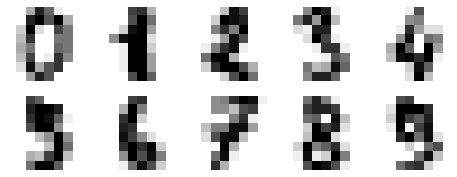

In [2]:
print ("labels: ", digits.target[0:10])
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
images = digits.images[0:10]
for axi, image in zip(ax.flat, images):
    axi.set(xticks=[], yticks=[])
    axi.imshow(image, interpolation='nearest', cmap=plt.cm.binary)


## Use k-means to cluster the digits

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape


(10, 64)

Let represent the centroids as images. Note that a centroid is a 8x8 table where each entry represents the bit lightness. Actually it is the mean of all objects in the cluster. 

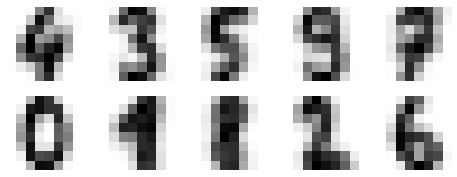

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


Now we are going to see how the predicted labels compare to the "true" ones. Since k-means does not know that image "4" has anything to do with number "4" we need to map the k-means generated labels with the one it represents. 

In [5]:
print("K-means labels: ", clusters[0:20])
print("True labels:    ", digits.target[0:20])

K-means labels:  [5 7 7 1 0 3 9 4 3 3 5 6 8 1 0 2 9 4 7 3]
True labels:     [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [6]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Let's check the accuracy of the k-means:

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

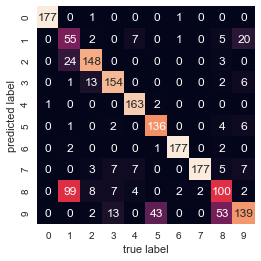

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
from sklearn import metrics
print(metrics.classification_report(digits.target, labels))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       178
          1       0.61      0.30      0.40       182
          2       0.85      0.84      0.84       177
          3       0.88      0.84      0.86       183
          4       0.98      0.90      0.94       181
          5       0.91      0.75      0.82       182
          6       0.97      0.98      0.98       181
          7       0.86      0.99      0.92       179
          8       0.45      0.57      0.50       174
          9       0.56      0.77      0.65       180

avg / total       0.81      0.79      0.79      1797



## Dimentionality and distace

It is well known that distances in high dimentional data may cause problems. From Charu C. Aggarwal, Alexander Hinneburg, Daniel A. Keim, "On the Surprising Behavior of Distance Metrics in High Dimensional Space":

It has been argued in [Kevin Beyer, Jonathan Goldstein, Raghu Ramakrishnan, Uri Shaft, "When Is 'Nearest Neighbor' Meaningful?"] that under certain reasonable assumptions on the data distribution, the ratio of the distances of the nearest and farthest neighbors to a given target in high dimensional space is almost 1 for a wide variety of data distributions and distance functions. In such a case, the nearest neighbor problem becomes ill defined, since the contrast between the distances to diferent data points does not exist. In such cases, even the concept of proximity may not be meaningful from a qualitative perspective: a problem which is even more fundamental than the performance degradation of high dimensional algorithms.





### Reduce dimensionality with PCA
PCA works best when variables have a linear depenceny otherwise the results obtained may not be the expected

In [18]:
from sklearn.decomposition import PCA

# Project the data: this step will take several seconds
pca = PCA(n_components=2)  # Try also with n_components=10
digits_proj = pca.fit_transform(digits.data)
    
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.5954368391764051

In [19]:
from sklearn import metrics
print(metrics.classification_report(digits.target, labels))

             precision    recall  f1-score   support

          0       0.92      0.90      0.91       178
          1       0.74      0.47      0.58       182
          2       0.63      0.64      0.64       177
          3       0.61      0.49      0.55       183
          4       0.83      0.80      0.81       181
          5       0.00      0.00      0.00       182
          6       0.78      0.83      0.80       181
          7       0.55      0.65      0.60       179
          8       0.31      0.76      0.44       174
          9       0.45      0.43      0.44       180

avg / total       0.58      0.60      0.58      1797



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


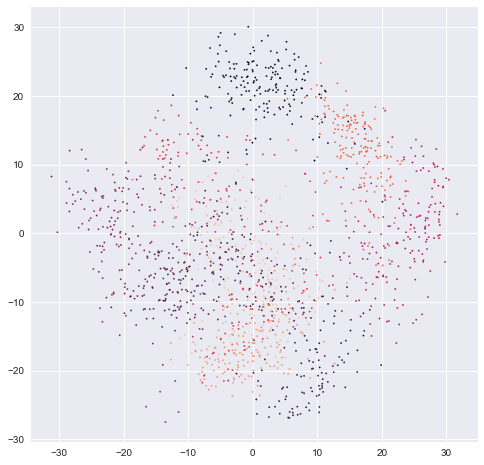

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig_size = [8, 8]
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots(1,1)
ax.scatter(digits_proj[:,0], digits_proj[:,1], s=2, c=digits.target)

### Reduce dimensionality with t-SNE

**t-Distributed Stochastic Neighbor Embedding**
This method maps a high dimentional space to a low (usually 2-dimentional space). This method models the distance between two data points as a joint probability. Then tries to obtain a map that minimize the Kullback-Leibler distance (divergence) between high and low dimensional spaces.

Kullback-Leibler measures the divergence between two probability distributions.

Now, we'll see what happens when we reduce the dimensionality with t-SNE...


In [25]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

In [26]:
from sklearn import metrics
print(metrics.classification_report(digits.target, labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.86      0.75      0.80       182
          2       0.84      0.94      0.89       177
          3       0.99      0.92      0.95       183
          4       1.00      0.98      0.99       181
          5       0.98      0.98      0.98       182
          6       0.99      1.00      1.00       181
          7       0.92      1.00      0.96       179
          8       0.80      0.96      0.87       174
          9       0.99      0.79      0.88       180

avg / total       0.94      0.93      0.93      1797



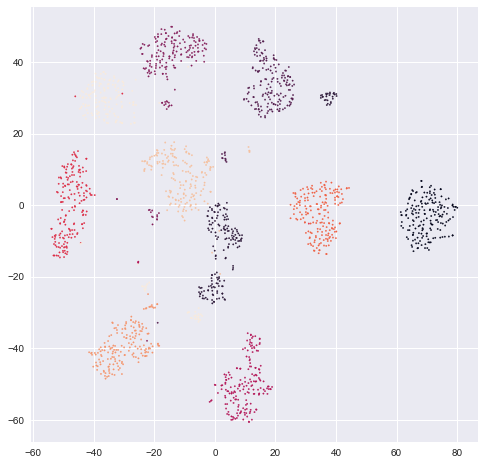

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig_size = [8, 8]
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots(1,1)
ax.scatter(digits_proj[:,0], digits_proj[:,1], s=2, c=digits.target)

# Choosing the number of components

## PCA

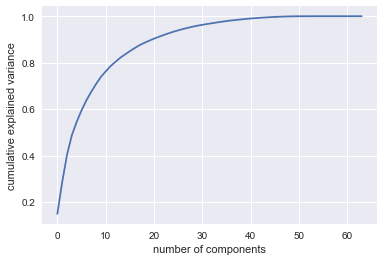

In [4]:
from sklearn.decomposition import PCA

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(init='random', random_state=0).fit(digits.data)
tsne.explained
